# **PROJECT NAME:** **Used Car Price Prediction**

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

Building a model that predicts the price of used car based on features like selling_price, present_price, driven_kms, fuel_type, selling_type, transmission by using regression techniques to tackle this problem.

## Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style= 'darkgrid')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Oasis Infobyte/Project 3/car data.csv')

## Understanding of Data / Data Inspection

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(f'No. of Columns: {df.shape[1]}')
print(f'No. of Rows: {df.shape[0]}')
df.shape

No. of Columns: 9
No. of Rows: 301


(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Data Cleaning

In [7]:
# Checking Null Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

* There are no null values in columns and every columns consists correct data type. So there will be no data cleaning and changing data type.

In [8]:
# Checking Duplicate Values
df.duplicated().sum()

2

In [9]:
# Checking & Identifying Duplicates
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [10]:
# Checking & Identifying Duplicates
duplicates = df[df.duplicated() == True]
duplicates

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [11]:
# Remove Duplicated Values
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [12]:
# Checking Duplicate Values
''' duplicates_1 = df.groupby(['Car_Name', 'Year']).filter(lambda x: len(x)>1)
duplicates_1 '''

" duplicates_1 = df.groupby(['Car_Name', 'Year']).filter(lambda x: len(x)>1)\nduplicates_1 "

In [13]:
''' df.drop_duplicates(['Car_Name', 'Year'], keep= False, inplace= True) '''

" df.drop_duplicates(['Car_Name', 'Year'], keep= False, inplace= True) "

## **Exploratory Data Analysis**

In [14]:
# Descriptive Analysis
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
# Descriptive Analysis of Object Dtype
df.describe(include= 'O')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,193,260


In [16]:
df['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

From above we can see a single car owned by how many members and we found that there are 10 snigle owned cars,1 car is owned by 3 owners and 290 cars have no owner.

Exploring Categorical Features

In [17]:
#Exploring Categorical Features
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64 



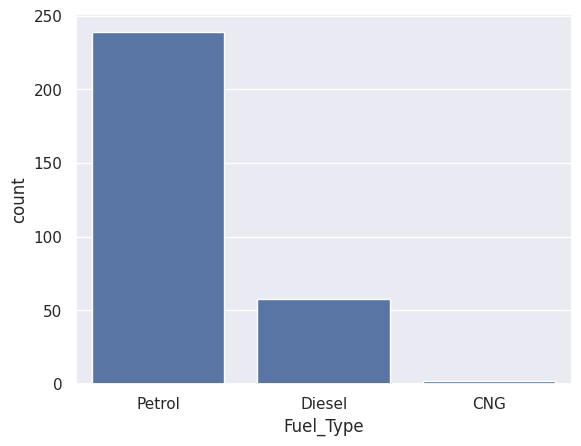

In [18]:
fuel = df['Fuel_Type'].value_counts()
print(fuel, '\n')

sns.countplot(df, x= 'Fuel_Type')
plt.show()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64 



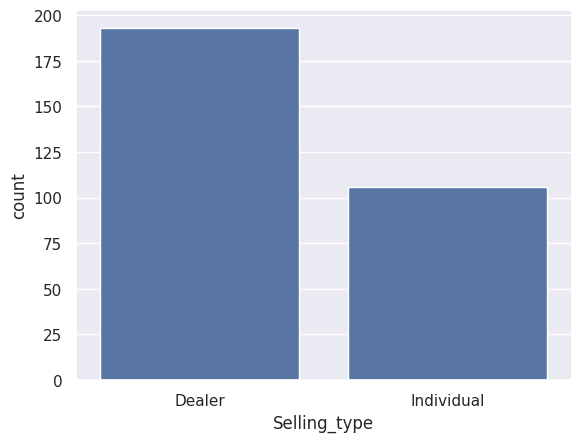

In [19]:
sell_type = df['Selling_type'].value_counts()
print(sell_type, '\n')

sns.countplot(df, x= 'Selling_type')
plt.show()

Manual       260
Automatic     39
Name: Transmission, dtype: int64 



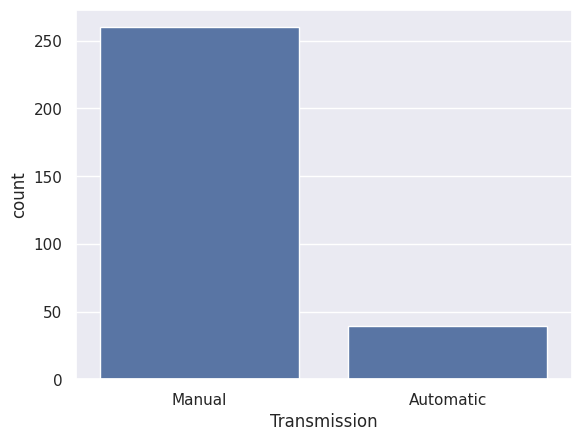

In [20]:
trans = df['Transmission'].value_counts()
print(trans, '\n')

sns.countplot(df, x= 'Transmission')
plt.show()

Exploring Numerical Features

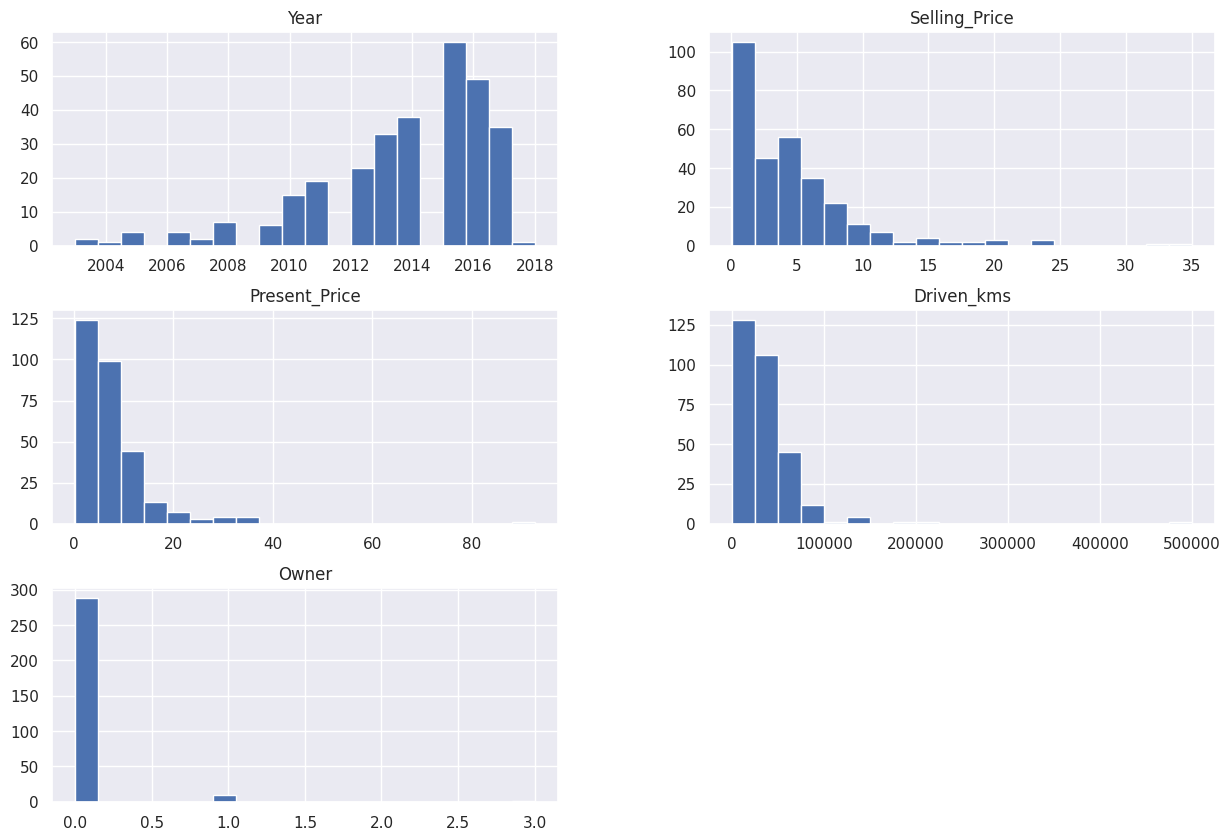

In [21]:
# Exploring Numerical features
df.hist(bins= 20, figsize= (15,10))
plt.show()

Simply Histogram of different numerical features shows us the distribution density.

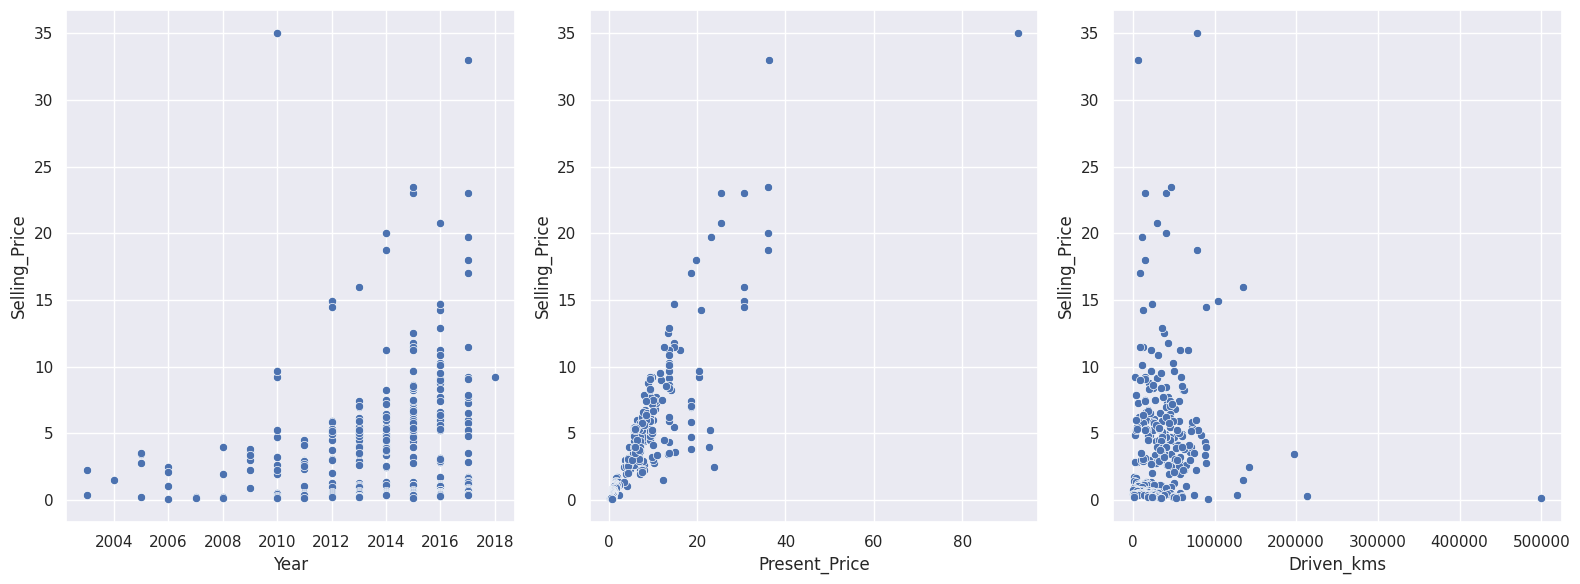

In [22]:
# Finding relationships between different numerical features and our target features
plt.figure(figsize= (16, 6))
plt.subplot(1,3,1)
sns.scatterplot(x= 'Year', y= 'Selling_Price', data= df)
plt.subplot(1,3,2)
sns.scatterplot(x= 'Present_Price', y= 'Selling_Price', data= df)
plt.subplot(1,3,3)
sns.scatterplot(x= 'Driven_kms', y= 'Selling_Price', data= df)
plt.tight_layout()
plt.show()

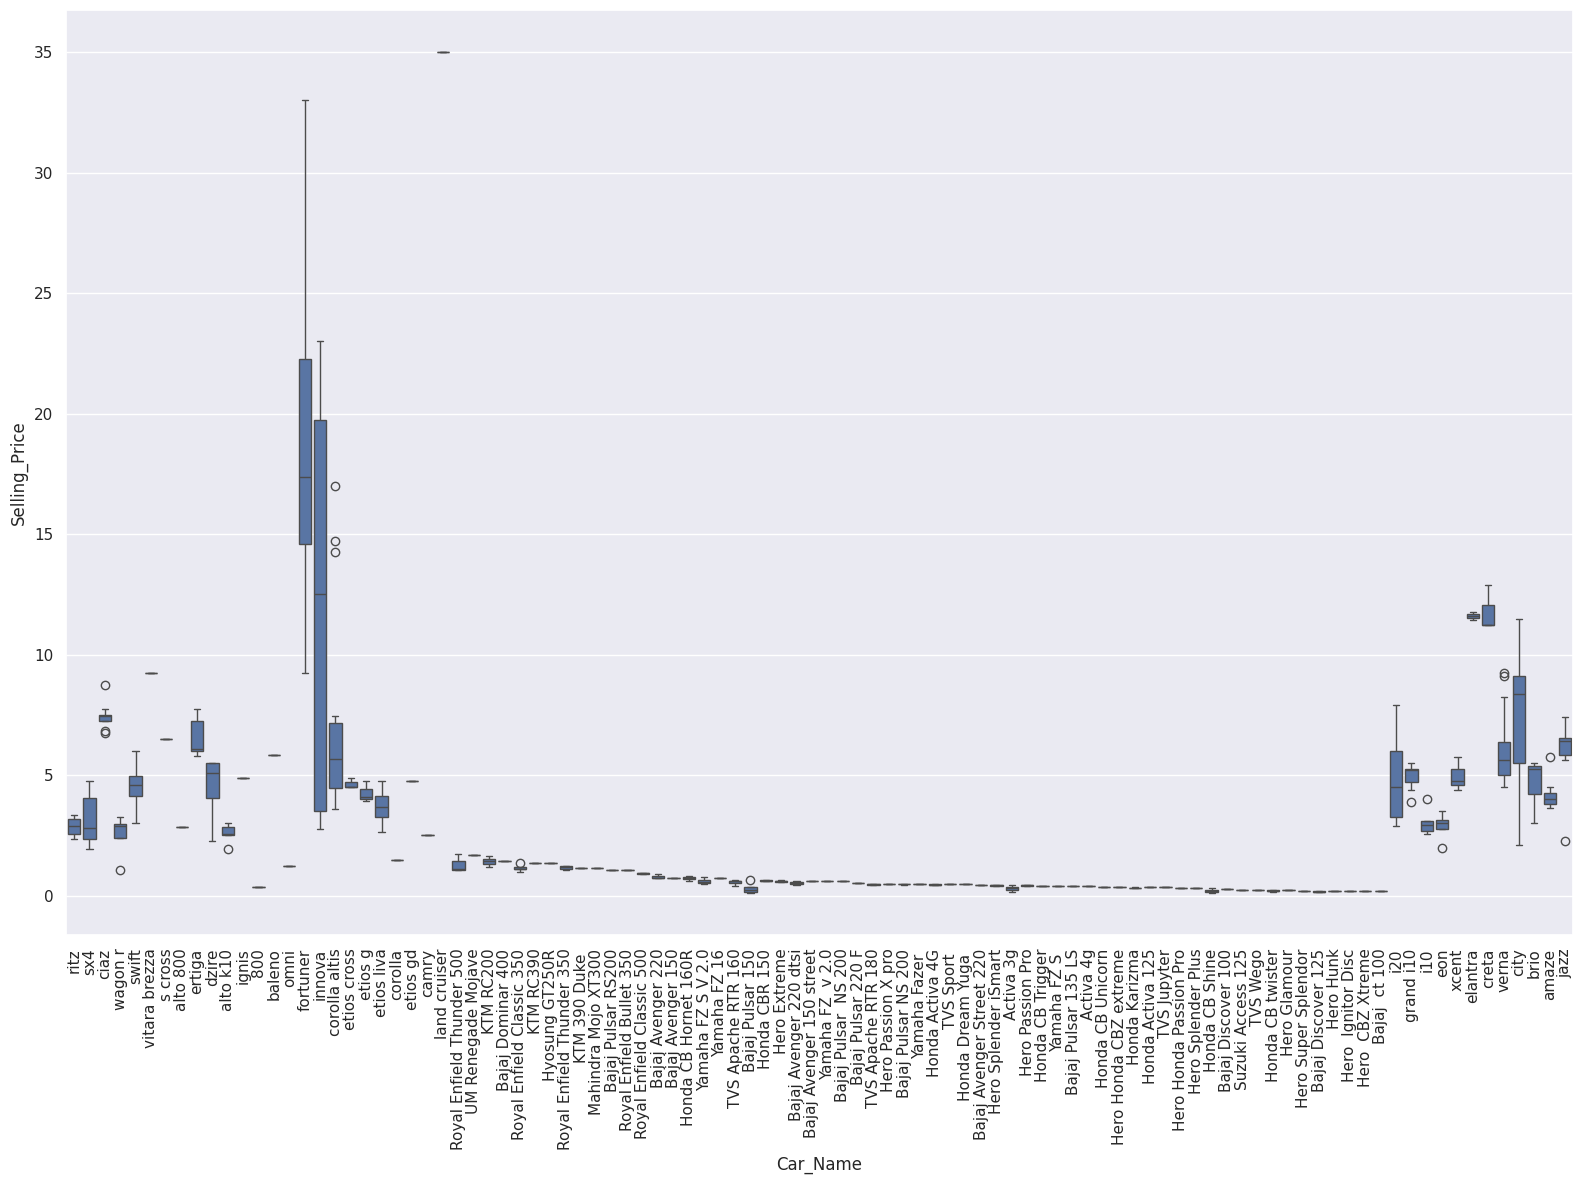

In [23]:
# Finding relationship between Cars and it's Selling price using Boxplot
plt.figure(figsize= (16,12))
sns.boxplot(x= 'Car_Name', y= 'Selling_Price', data= df)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

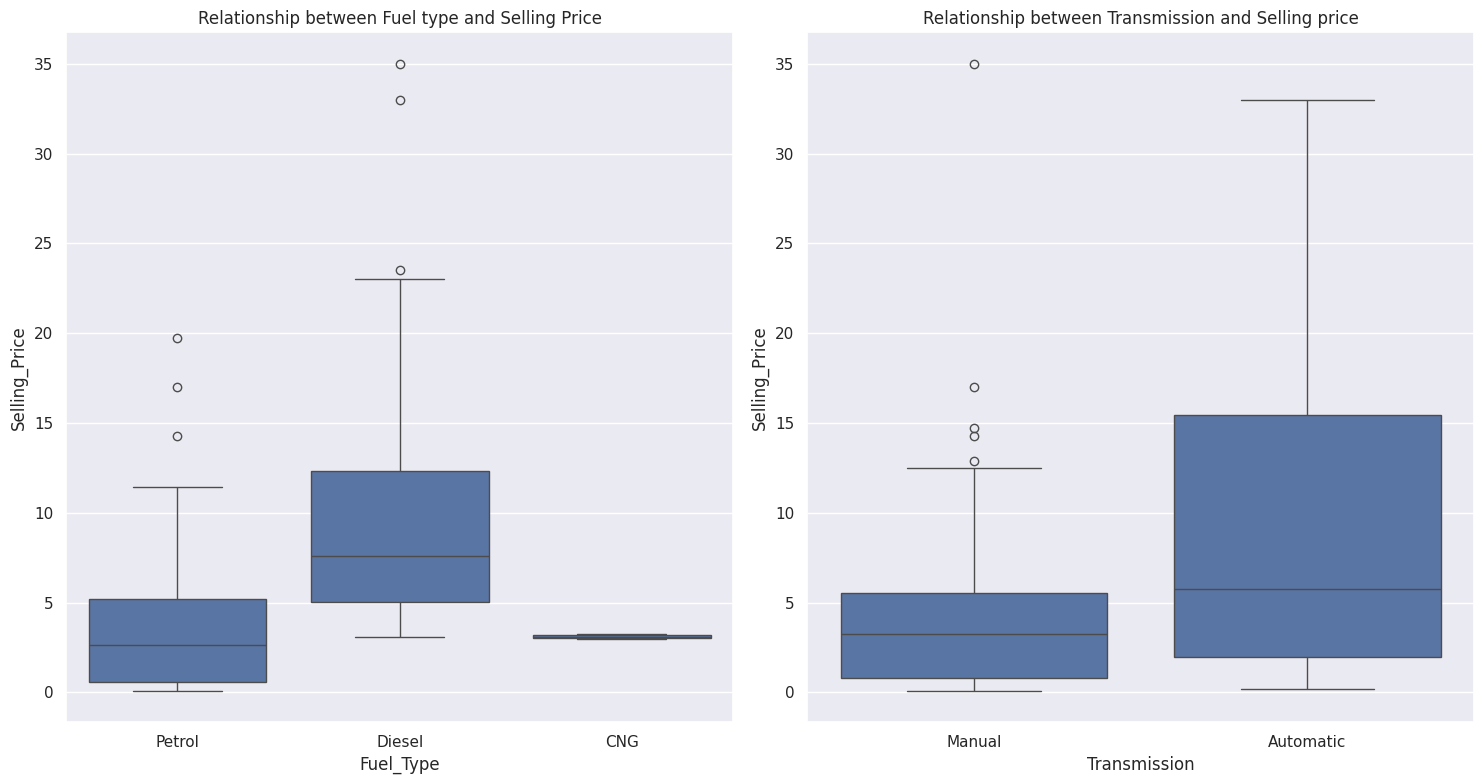

In [24]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.boxplot(df, x= 'Fuel_Type', y= 'Selling_Price')
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1,2,2)
sns.boxplot(df, x= 'Transmission', y= 'Selling_Price')
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

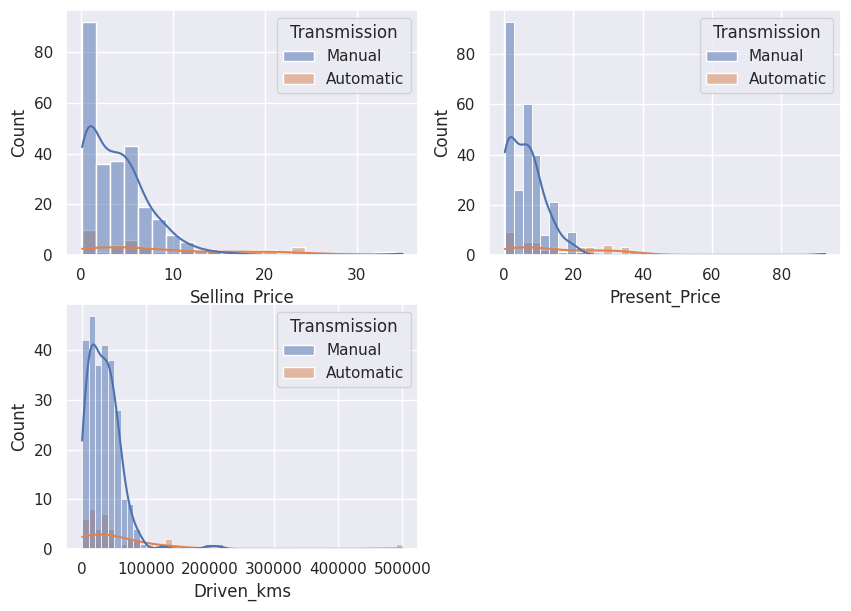

In [25]:
plt.figure(figsize= (10,7))
for i, col in enumerate(['Selling_Price', 'Present_Price', 'Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.histplot(df, x= col, kde= True, hue= 'Transmission')

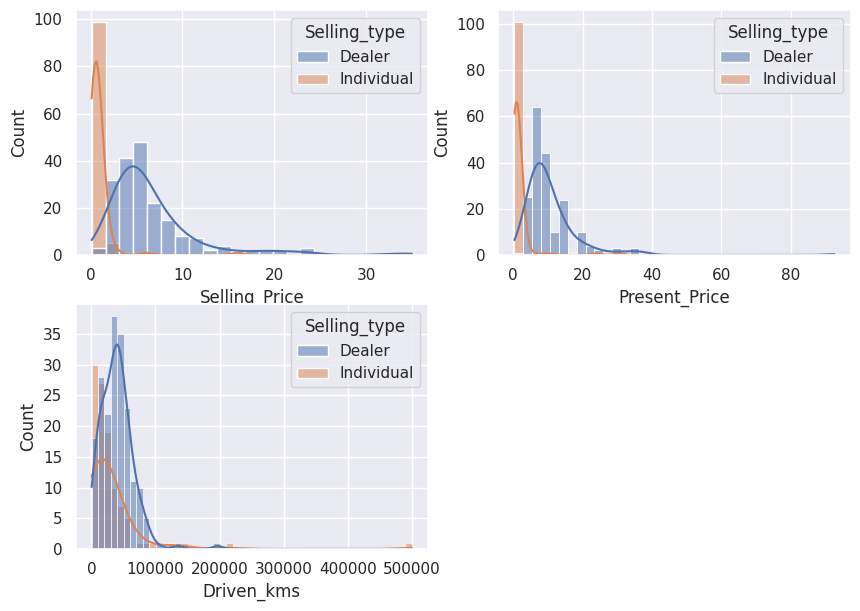

In [26]:
plt.figure(figsize= (10,7))
for i, col in enumerate(['Selling_Price', 'Present_Price', 'Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.histplot(df, x= col, kde= True, hue= 'Selling_type')

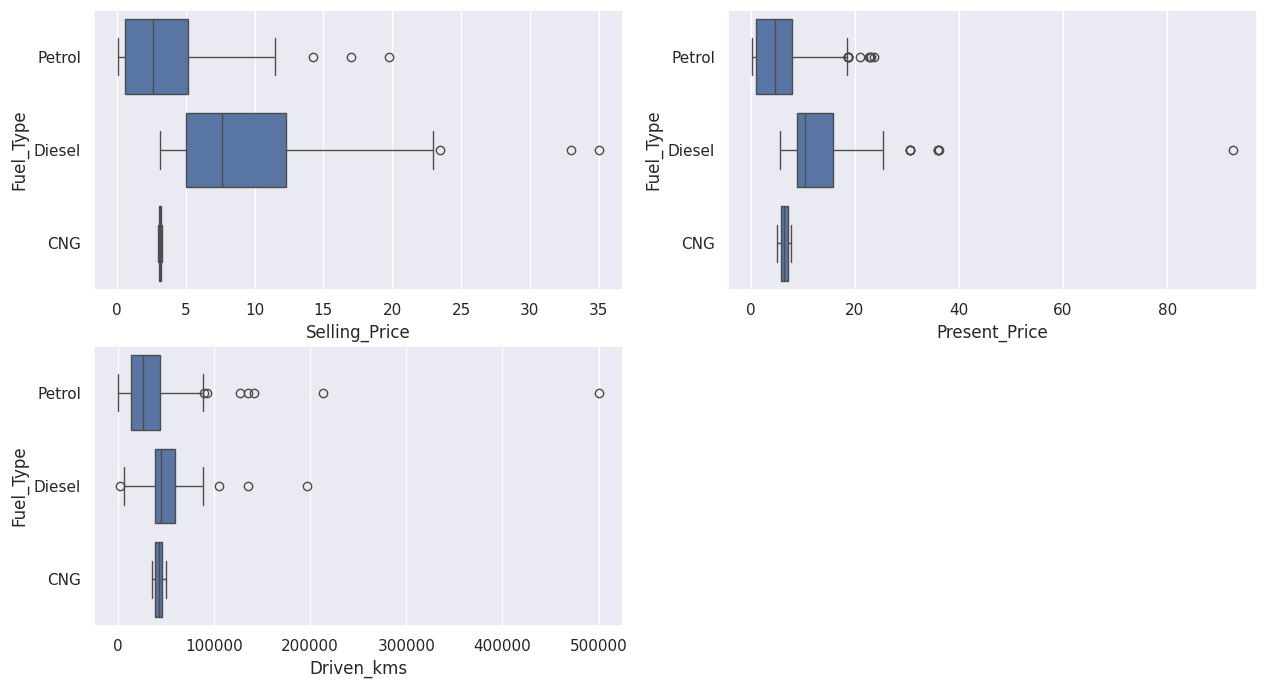

In [27]:
plt.figure(figsize= (15,8))
for i, col in enumerate(['Selling_Price', 'Present_Price', 'Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(df, x= col, y= 'Fuel_Type', orient= 'h')

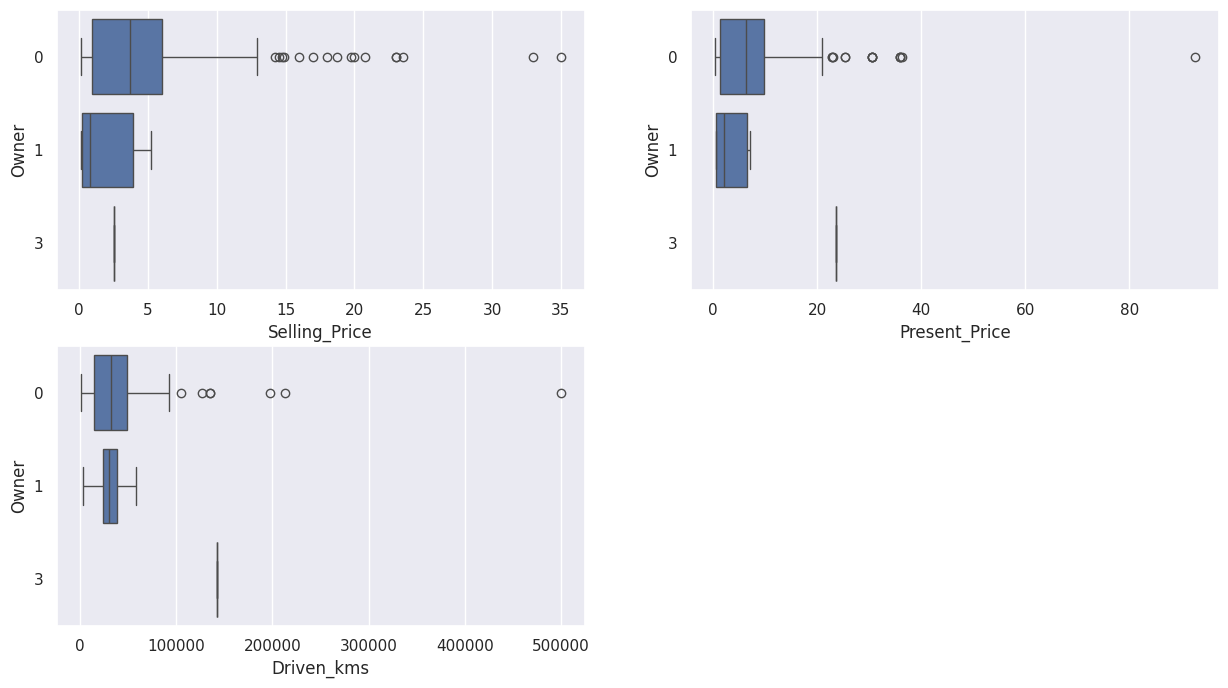

In [28]:
plt.figure(figsize=(15,8))
for i, col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(df, x= col, y= 'Owner', orient= 'h')

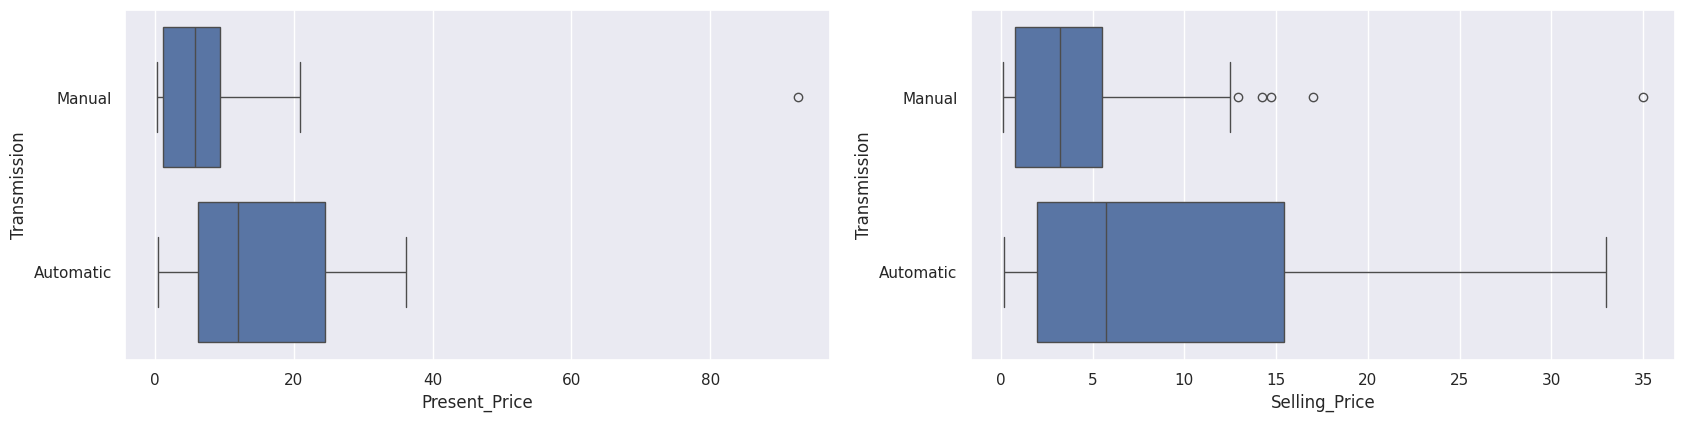

In [29]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['Present_Price', 'Selling_Price']):
  plt.subplot(2,2,i+1)
  sns.boxplot(df, x= col, y= 'Transmission', orient= 'h')

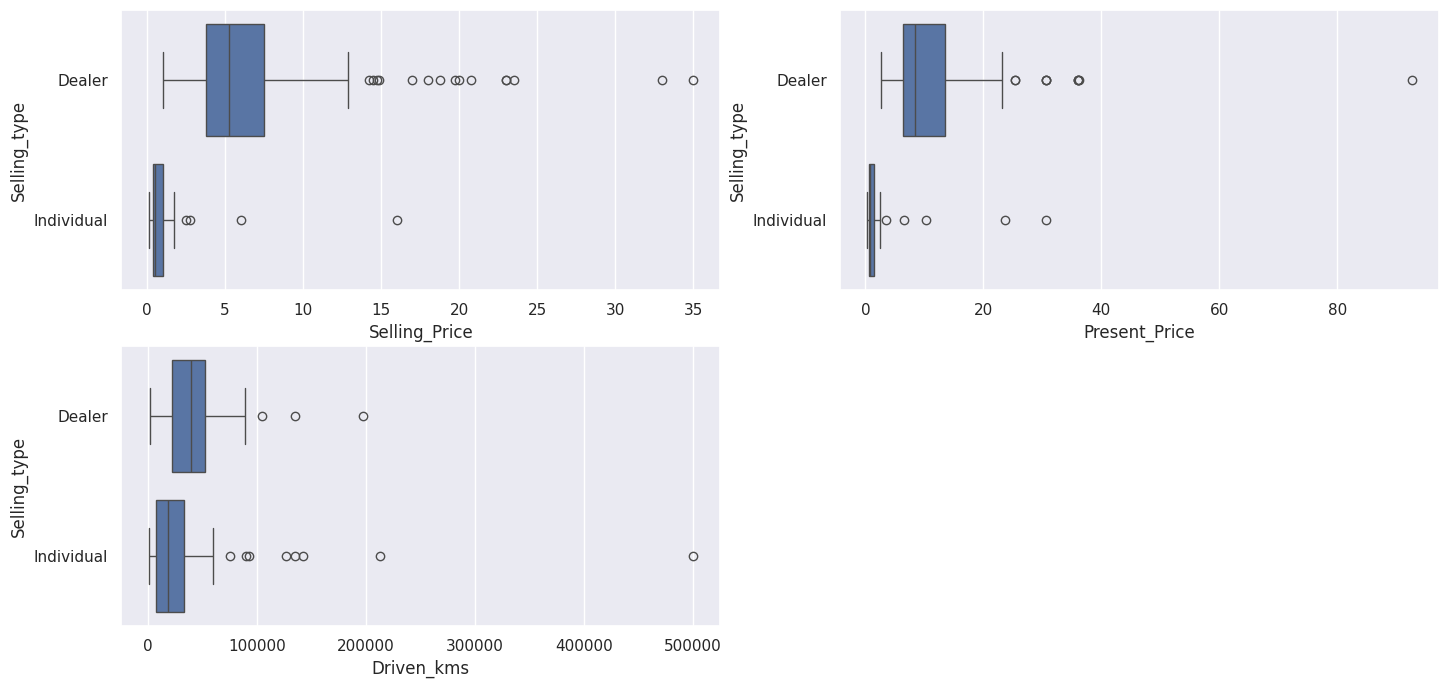

In [30]:
plt.figure(figsize=(17,8))
for i, col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.boxplot(df, x= col, y= 'Selling_type', orient= 'h')

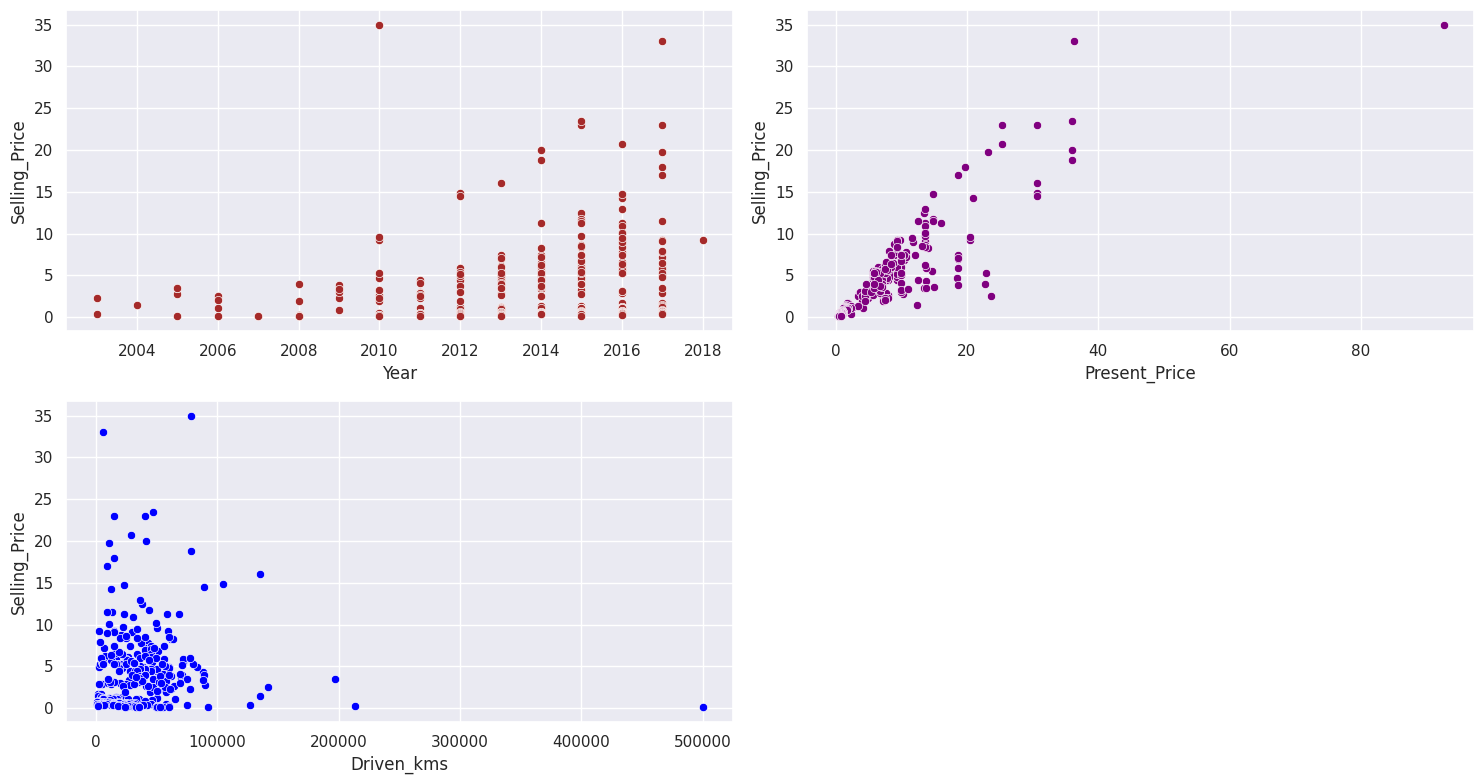

In [31]:
plt.figure(figsize= (15,8))
color = ['brown', 'purple', 'blue']
for i, col in enumerate(['Year','Present_Price','Driven_kms']):
  plt.subplot(2,2,i+1)
  sns.scatterplot(df, x= col, y= 'Selling_Price', color= color[i])
plt.tight_layout()

# **Predictive Analysis**

Let's start building different Machine Learning models and train them.

### Data Preprocessing

In [32]:
# Remove Outliers of the data
def remove_outliers(col):
  d25 = df[col].quantile(0.25)
  d75 = df[col].quantile(0.75)
  iqr = d75 - d25
  upper_lim = d75 + 1.5*iqr
  lower_lim = d25 - 1.5*iqr
  filter_data = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]
  return filter_data

df = remove_outliers('Present_Price')
df = remove_outliers('Selling_Price')
df = remove_outliers('Driven_kms')

Feature Engineering

In [33]:
# Hot Encoding
encoder = LabelEncoder()

encoder.fit(df['Fuel_Type'])
df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])
dicft = dict(enumerate(encoder.classes_))
print(dicft)

encoder.fit(df['Selling_type'])
df['Selling_type']= encoder.fit_transform(df['Selling_type'])
dicst = dict(enumerate(encoder.classes_))
print(dicst)

encoder.fit(df['Transmission'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])
dictt = dict(enumerate(encoder.classes_))
print(dictt)

encoder.fit(df['Car_Name'])
df['Car_Name'] = encoder.fit_transform(df['Car_Name'])
diccn = dict(enumerate(encoder.classes_))
print(diccn)

df.head()

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'}
{0: 'Dealer', 1: 'Individual'}
{0: 'Automatic', 1: 'Manual'}
{0: 'Activa 3g', 1: 'Activa 4g', 2: 'Bajaj  ct 100', 3: 'Bajaj Avenger 150', 4: 'Bajaj Avenger 150 street', 5: 'Bajaj Avenger 220', 6: 'Bajaj Avenger 220 dtsi', 7: 'Bajaj Avenger Street 220', 8: 'Bajaj Discover 100', 9: 'Bajaj Discover 125', 10: 'Bajaj Dominar 400', 11: 'Bajaj Pulsar  NS 200', 12: 'Bajaj Pulsar 135 LS', 13: 'Bajaj Pulsar 150', 14: 'Bajaj Pulsar 220 F', 15: 'Bajaj Pulsar NS 200', 16: 'Bajaj Pulsar RS200', 17: 'Hero  CBZ Xtreme', 18: 'Hero  Ignitor Disc', 19: 'Hero Extreme', 20: 'Hero Glamour', 21: 'Hero Honda CBZ extreme', 22: 'Hero Honda Passion Pro', 23: 'Hero Hunk', 24: 'Hero Passion Pro', 25: 'Hero Passion X pro', 26: 'Hero Splender Plus', 27: 'Hero Splender iSmart', 28: 'Hero Super Splendor', 29: 'Honda Activa 125', 30: 'Honda Activa 4G', 31: 'Honda CB Hornet 160R', 32: 'Honda CB Shine', 33: 'Honda CB Trigger', 34: 'Honda CB Unicorn', 35: 'Honda CB twister', 36: 'Honda

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


In [34]:
# Select and define features(x) and target variable(y)
x = df.copy()
x = x.drop('Selling_Price', axis= 1)
y = df['Selling_Price']
y = y.values.reshape(-1,1)

In [35]:
x[:5]

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,5.59,27000,2,0,1,0
1,89,2013,9.54,43000,1,0,1,0
2,66,2017,9.85,6900,2,0,1,0
3,92,2011,4.15,5200,2,0,1,0
4,88,2014,6.87,42450,1,0,1,0


In [36]:
y[:5]

array([[3.35],
       [4.75],
       [7.25],
       [2.85],
       [4.6 ]])

In [37]:
# Scaling & standardize the features # transforming
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [38]:
x[:5]

array([[ 1.06844164,  0.10349584, -0.09522517, -0.2523208 ,  0.43730431,
        -0.75969919,  0.30151134, -0.19389168],
       [ 1.19009589, -0.26747626,  0.71317287,  0.51119162, -2.07719547,
        -0.75969919,  0.30151134, -0.19389168],
       [ 0.25741333,  1.21641213,  0.77661677, -1.21148327,  0.43730431,
        -0.75969919,  0.30151134, -0.19389168],
       [ 1.31175014, -1.00942046, -0.3899323 , -1.29260647,  0.43730431,
        -0.75969919,  0.30151134, -0.19389168],
       [ 1.14954447,  0.10349584,  0.16673673,  0.48494588, -2.07719547,
        -0.75969919,  0.30151134, -0.19389168]])

In [39]:
y[:5]

array([[-0.12818858],
       [ 0.3303992 ],
       [ 1.14930595],
       [-0.29196993],
       [ 0.2812648 ]])

Data Spliting

In [40]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, test_size= 0.3, random_state= 42)

### Model Building

In [41]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(lr.score(x_train, y_train))

# Dcision Tree Regression
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
print(dtr.score(x_train, y_train))

# Random Forest Regression
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
print(rfr.score(x_train, y_train))

0.8607262702899532
1.0
0.9905859273024433


### Model Evaluation

In [42]:
# Evaluating the performance of trained algorithms
print('1. The performance evaluation of Linear Regression is below: ', '\n')
print('Mean Squared Error: ', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_pred))
print('R2_Score: ', r2_score(y_test, lr_pred))
print('\n','='*100, '\n')

print('2. The performance evaluation of Decision Tree Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, dtr_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score: ', r2_score(y_test, dtr_pred))
print('\n', '='*100, '\n')

print('3. The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, rfr_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score: ', r2_score(y_test, rfr_pred))

1. The performance evaluation of Linear Regression is below:  

Mean Squared Error:  0.17754235545989497
Mean Absolute Error:  0.29053570324224876
R2_Score:  0.8413068413454772


2. The performance evaluation of Decision Tree Regression is below:  

Mean squared error:  0.07173911863033089
Mean absolute error:  0.16776735344735785
R2 Score:  0.9358772316327054


3. The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.038111592778087997
Mean absolute error:  0.11862663412990038
R2 Score:  0.9659346130468801


Actual Output vs Predicted Output

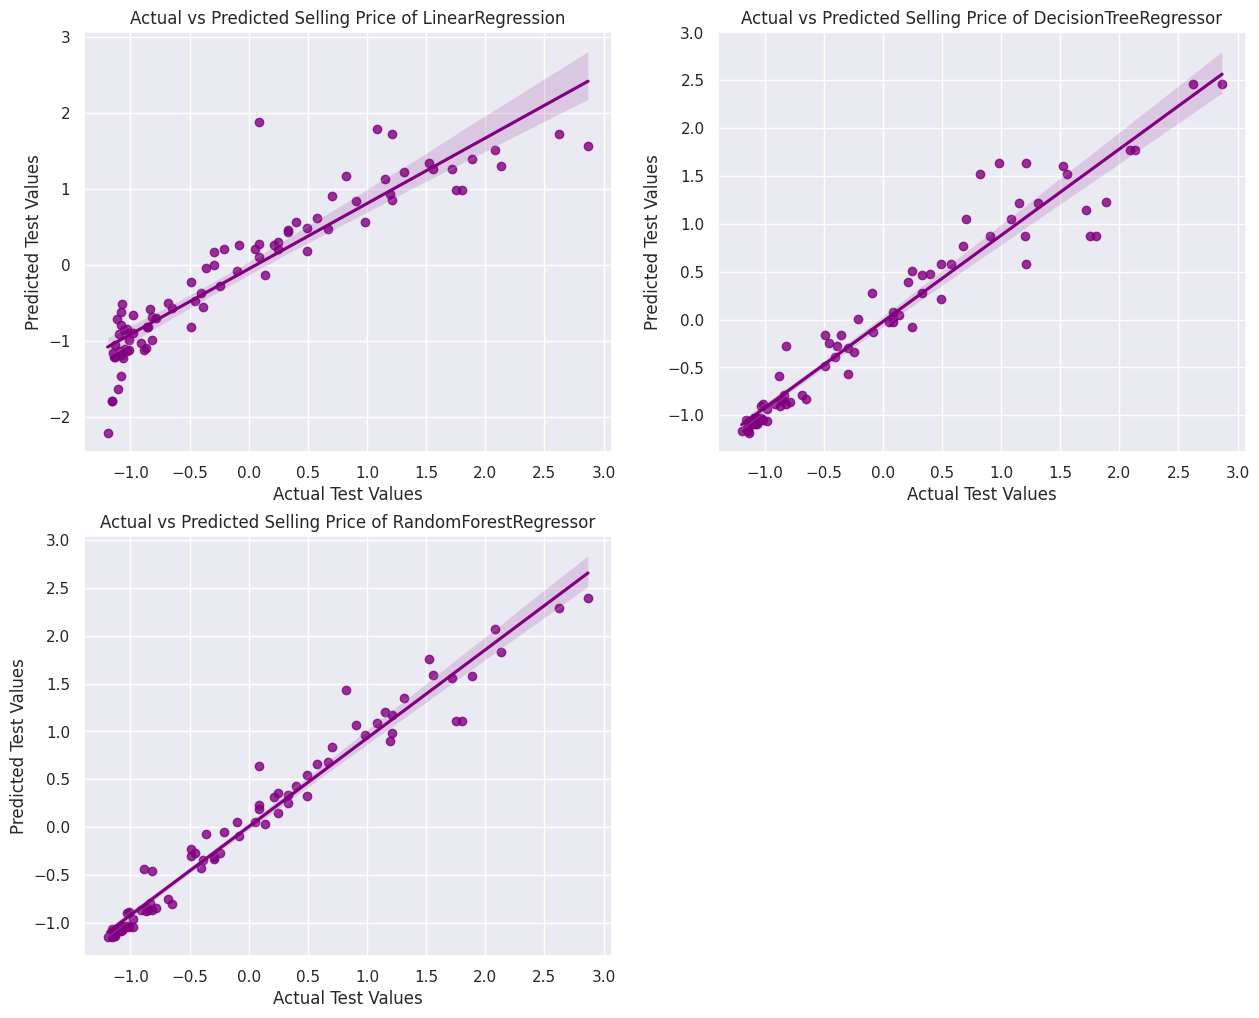

In [56]:
plt.figure(figsize=(15,12))
model = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
for i, col in enumerate([lr_pred, dtr_pred, rfr_pred]):
  plt.subplot(2,2,i+1)
  sns.regplot(x= y_test, y= col, color= 'purple')
  plt.title(f'Actual vs Predicted Selling Price of {model[i]}')
  plt.xlabel('Actual Test Values')
  plt.ylabel('Predicted Test Values')

* As per the plots mentioned above, Random forest Regression model perfoms better than other models with R2_Score of 0.96

Importance of Features

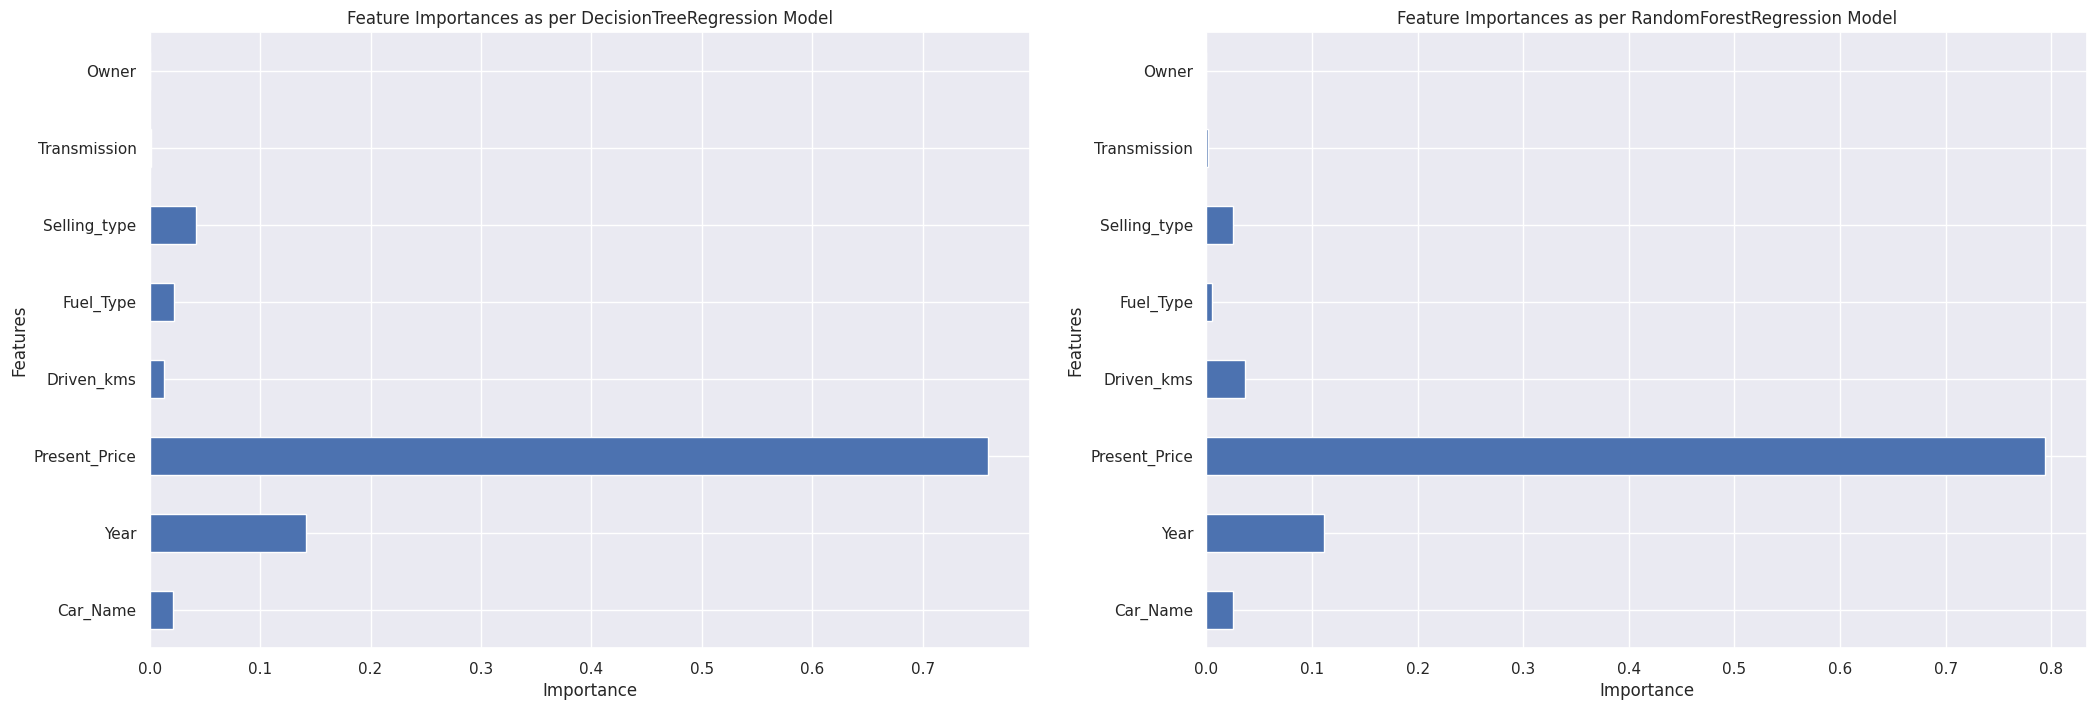

In [75]:
plt.figure(figsize=(25,8))
model = ['DecisionTreeRegression', 'RandomForestRegression']
for i, col in enumerate([dtr, rfr]):
  plt.subplot(1,2,i+1)
  imp_feat = pd.Series(col.feature_importances_, index= ['Car_Name', 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])
  imp_feat.plot(kind= 'barh')
  plt.ylabel('Features')
  plt.xlabel('Importance')
  plt.title(f'Feature Importances as per {model[i]} Model')

In [78]:
pd.Series(rfr.feature_importances_, index= ['Car_Name', 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

Car_Name         0.025437
Year             0.111630
Present_Price    0.794240
Driven_kms       0.036872
Fuel_Type        0.005318
Selling_type     0.025088
Transmission     0.001364
Owner            0.000051
dtype: float64

.

Result

**Random Forest Regressor: \
Mean Squared Error: 0.3587487913084846\
R2 Score: 0.9661355472028293**


**Decision Tree Regressor:\
Mean Squared Error: 0.5091734939759035 \
R2 Score: 0.9519360561761713**


* Therefore, Suitable model is Random Forest Regressor which performed better than other models, As less MSE and more R2_Score comparatively.